f(x) = x2 - 6*abs(x)

1. Определить корни

2. Найти интервалы, на которых функция возрастает

3. Найти интервалы, на которых функция убывает

4. Построить график

5. Вычислить вершину

6. Определить промежутки, на котором f > 0

7. Определить промежутки, на котором f < 0

In [1]:
import math
from sympy import *
x = symbols('x', real=True)
y = x**2 - 6*abs(x) + 8
y

x**2 - 6*Abs(x) + 8

1. Определить корни.

In [2]:
roots = solve(y)
roots

[-4, -2, 2, 4]

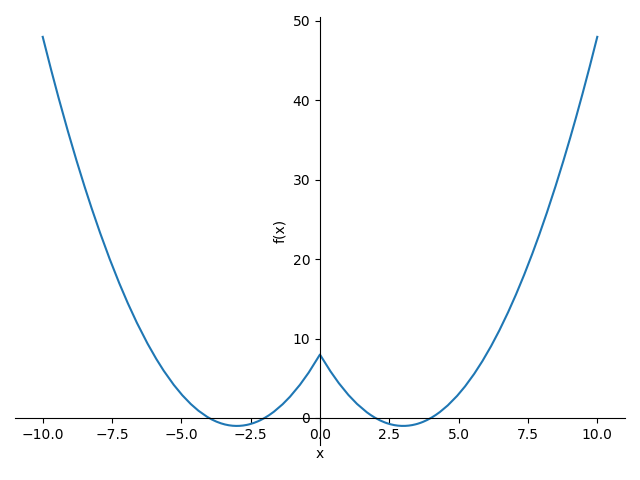

In [3]:
plot(y)

Найти производную для нахождения экстремума

In [4]:
from sympy import *
x = symbols('x', real=True)
y = x**2 - 6*abs(x) + 8
roots = solve(x**2 - 6*abs(x) + 8)
der_y = diff(y)
der_y

2*x - 6*sign(x)

Корни производной (точки экстремума)

In [5]:
roots_der_y = solve(der_y)
roots_der_y

[3]

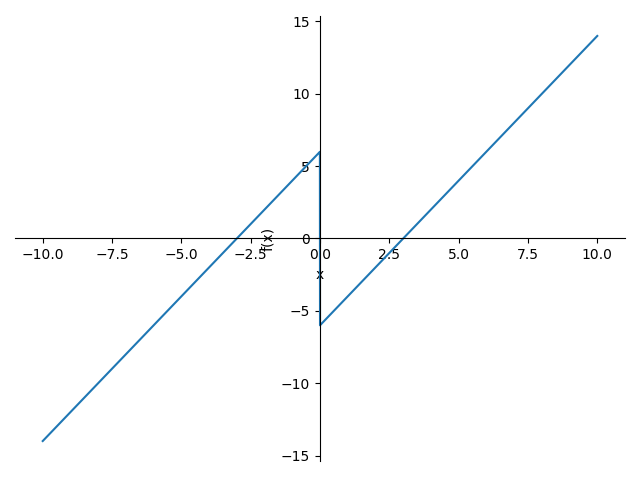

In [6]:
plot(der_y)

Производная равна нулю в точках 3 и -3. В точке х = 0 
видим излом функции. Добавим недостающие точки в корни производной:

In [7]:
roots_der_y.append(roots_der_y[0] * -1)
roots_der_y.append(0)
roots_der_y = sorted(roots_der_y)
roots_der_y

[-3, 0, 3]

Вычислим вершины

In [8]:
min_value = -3
max_value = 3
for i in roots_der_y:
    min_value = i-0.01 if i == 0 else i-0.01*abs(i)
    max_value = i+0.01 if i == 0 else i+0.01*abs(i)
    if der_y.evalf(subs={x: min_value}) < der_y.evalf(subs={x: i}) and der_y.evalf(subs={x: max_value}) > der_y.evalf(subs={x: i}):
        print(f'точка минимума - "{i}"')
    else:
        print(f'точка максимума - "{i}"')

точка минимума - "-3"
точка максимума - "0"
точка минимума - "3"


Интервалы, на которых функция возрастает и убывает:

In [9]:
def intervals(roots):
    interval = []
    interval.append([roots[0]-1, roots[0]])
    for i in range(len(roots)-1):
        r = [roots[i], roots[i+1]]
        interval.append(r)
    interval.append([roots[-1], roots[-1]+1])
    return interval

new_interval = intervals(roots_der_y)

for i in new_interval:
    if new_interval.index(i) == 0:
        start = -oo
    else:
        i[0]
    if new_interval.index(i) == len(new_interval)-1:
        end = oo 
    else:
        i[1]
    if der_y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'Функция возрастает на промежутке {start, end}')
    else:
        print(f'Функция убывает на промежутке {start, end}')

<class 'NameError'>: name 'end' is not defined

Промежутки, на которых f > 0 и f < 0

In [10]:
interval_y = intervals(roots)

for i in interval_y:
    start = -oo if interval_y.index(i) == 0 else i[0]
    end = oo if interval_y.index(i) == len(interval_y)-1 else i[1]
    if y.evalf(subs={x:(i[0] + i[1])/2}) > 0:
        print(f'f > 0 на промежутке {start, end}')
    else:
        print(f'f < 0 на промежутке {start, end}')

f > 0 на промежутке (-oo, -4)
f < 0 на промежутке (-4, -2)
f > 0 на промежутке (-2, 2)
f < 0 на промежутке (2, 4)
f > 0 на промежутке (4, oo)
